In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

from sklearn.model_selection import train_test_split

In [2]:
data_path = '../data/uci_data.xls'

In [3]:
df = pd.read_excel(data_path, header=0, index_col=0, skiprows=1)
df = df.rename(columns={'PAY_0': 'PAY_1'})

In [4]:
# I set all invalid values to 'other'
df.loc[~(df['EDUCATION'].isin([1, 2, 3, 4])), 'EDUCATION'] = 4
df.loc[~(df['MARRIAGE'].isin([1, 2, 3])), 'MARRIAGE'] = 3

# PAY_* fuera de rango
paux = ~(df['PAY_1'].isin([-1,0,1,2,3,4,5,6,7,8,9]))
for i in range(2, 7):
    paux = paux | ~(df['PAY_' + str(i)].isin([-1,0,1,2,3,4,5,6,7,8,9]))
    
df = df[~paux]

In [5]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train = train.drop(columns=('default payment next month'))
y_train = train[['default payment next month']]
X_test = test.drop(columns=('default payment next month'))
y_test = test[['default payment next month']]

LR: 0.772173 (0.008509)
LDA: 0.816277 (0.006274)
QDA: 0.691216 (0.035269)
KNN: 0.748601 (0.009044)
CART: 0.730948 (0.009142)
NB: 0.424990 (0.016628)
ADAB: 0.818890 (0.004832)
SGD: 0.771533 (0.008907)
BNB: 0.789878 (0.010070)
RC: 0.808544 (0.006882)
CCV: 0.772173 (0.008509)
SVML: 0.770573 (0.008446)
SVMR: 0.772333 (0.008509)
MLPC: 0.737347 (0.027205)
RF: 0.817343 (0.004779)


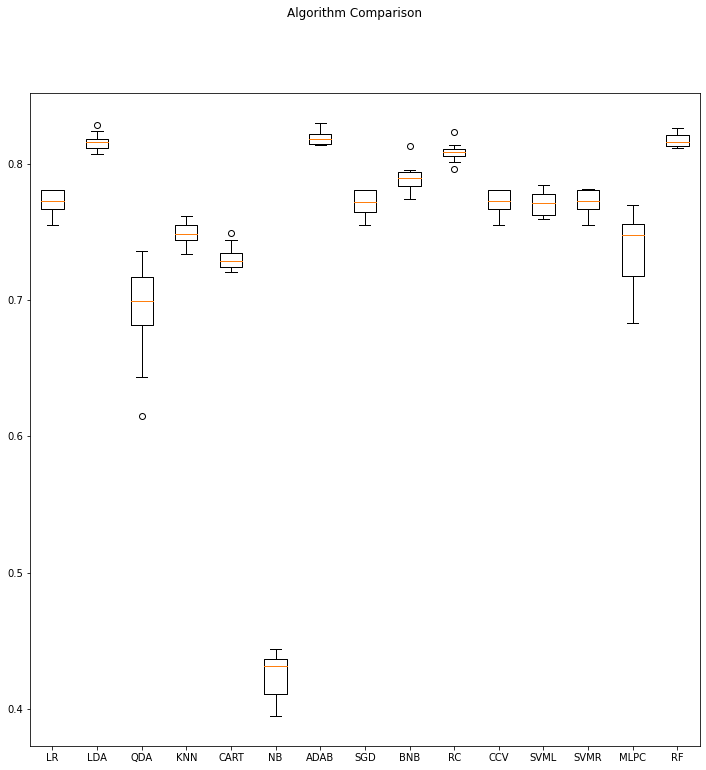

CPU times: user 22h 53min 7s, sys: 58.5 s, total: 22h 54min 5s
Wall time: 22h 52min 30s


In [6]:
%%time
# prepare models
base_clf = LogisticRegression(max_iter=1000)

models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('ADAB', AdaBoostClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('BNB', BernoulliNB()))
models.append(('RC', RidgeClassifier()))
models.append(('CCV', CalibratedClassifierCV(base_estimator=base_clf, cv=3)))
#models.append(('GP', GaussianProcessClassifier(1.0 * RBF(1.0))))
models.append(('SVML', SVC(kernel="linear", C=0.025)))
models.append(('SVMR', SVC(gamma=2, C=1)))
models.append(('MLPC', MLPClassifier(max_iter=1000, alpha=1)))
models.append(('RF', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train.values.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

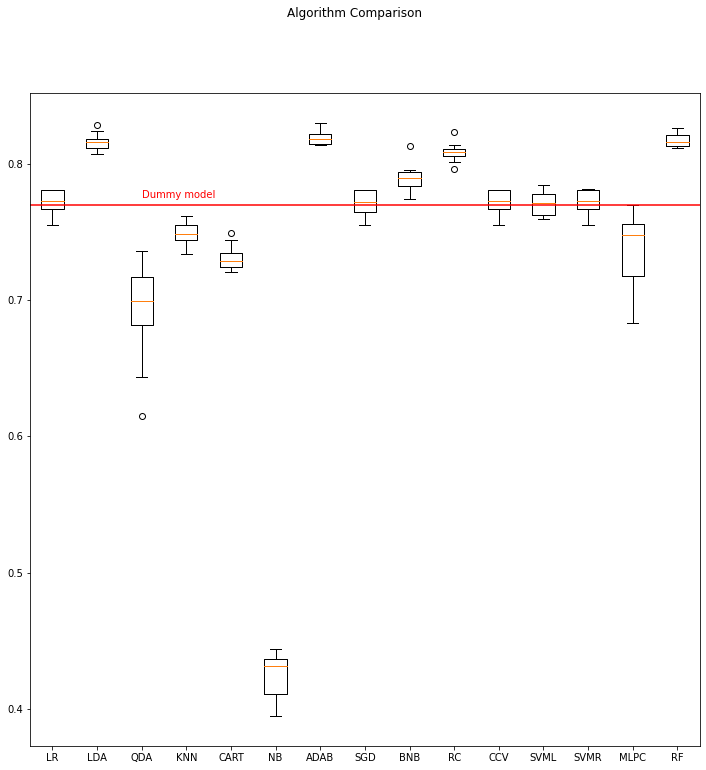

In [25]:
fig = plt.figure(figsize=(12,12))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.axhline(y=0.77, color='r', linestyle='-')
plt.annotate("Dummy model", (3, 0.775), color='r')
plt.show()